In [295]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
%matplotlib inline

import pandas_profiling


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt



from lightgbm import LGBMRegressor
import lightgbm as lgb

In [296]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_rb.csv'
print(dataset)
dataset = pd.read_csv(dataset, index_col = 0)
dataset.head()

#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_rb.csv


,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,selection_number,...,rushing_rec_yards,rushing_receptions,rushing_rush_att,rushing_rush_td,rushing_rush_yds,rushing_scrim_plays,rushing_scrim_tds,rushing_scrim_yds,rushing_seasons,max_madden
fms_id,,,,,,,,,,,,,,,,,,,,,
113,3886636.0,Alex Barnes,Alex,Barnes,RB,RB,O,Kansas State,2019,NaN,...,223,25,458,25,2616,483,25,2839,4,63.0
136,4048244.0,Alexander Mattison,Alexander,Mattison,RB,RB,O,Boise State,2019,NaN,...,511,60,581,33,2829,641,34,3340,3,68.0
414,NaN,Benny Snell,Benny,Snell,RB,RB,O,Kentucky,2019,NaN,...,216,29,737,48,3873,766,48,4089,3,69.0
645,3931398.0,Bryce Love,Bryce,Love,RB,RB,O,Stanford,2019,NaN,...,465,49,569,30,3865,618,32,4330,4,71.0
1182,3925347.0,Damien Harris,Damien,Harris,RB,RB,O,Alabama,2019,NaN,...,407,52,477,23,3070,529,25,3477,4,69.0


In [297]:
#pandas_profiling.ProfileReport(dataset)

In [298]:
dataset.describe()

,espn_id,draft_year,selection_number,position_rank,position_group_rank,section_rank,college_weight_pounds,college_height_inches,forty,vertical,...,rushing_rec_yards,rushing_receptions,rushing_rush_att,rushing_rush_td,rushing_rush_yds,rushing_scrim_plays,rushing_scrim_tds,rushing_scrim_yds,rushing_seasons,max_madden
count,6.500000e+01,528.000000,501.000000,501.000000,501.000000,501.000000,528.000000,528.000000,515.000000,430.000000,...,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,210.000000
mean,3.365359e+06,2009.719697,188.520958,14.103792,16.317365,65.900200,214.660985,70.558712,4.555864,34.360465,...,461.035985,50.318182,491.208333,25.405303,2626.901515,541.526515,28.062500,3087.937500,3.418561,75.576190
std,1.126266e+06,5.781689,106.229384,8.192509,10.247394,37.621989,14.195726,1.743614,0.110107,3.016129,...,333.294834,35.605219,212.733190,13.258864,1144.688323,229.564234,14.196435,1299.326719,0.928669,8.370397
min,5.454230e+05,2000.000000,2.000000,1.000000,1.000000,1.000000,168.000000,66.000000,4.240000,25.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
25%,3.127335e+06,2005.000000,90.000000,7.000000,7.000000,32.000000,206.000000,69.000000,4.480000,32.500000,...,224.750000,26.000000,346.750000,16.000000,1845.500000,380.500000,19.000000,2224.750000,3.000000,69.250000
50%,3.915381e+06,2010.000000,195.000000,14.000000,16.000000,65.000000,214.500000,71.000000,4.560000,34.000000,...,395.500000,44.000000,487.500000,24.000000,2593.000000,532.000000,27.000000,3102.000000,4.000000,74.500000
75%,4.035006e+06,2015.000000,300.000000,21.000000,25.000000,96.000000,224.000000,72.000000,4.630000,36.000000,...,641.250000,66.000000,617.250000,33.000000,3325.000000,677.000000,36.000000,3912.500000,4.000000,82.000000
max,4.372601e+06,2019.000000,300.000000,34.000000,44.000000,148.000000,267.000000,76.000000,4.930000,43.000000,...,2059.000000,303.000000,1220.000000,77.000000,7125.000000,1264.000000,87.000000,7444.000000,6.000000,97.000000


In [299]:
dataset['max_madden'].mean()

75.57619047619048

In [300]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'max_madden']


In [301]:
#Deal with None Values
none_dict = {'espn_id': 0,    
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
    'max_madden': dataset['max_madden'].min() - 10}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.555864077669903, 'vertical': 34.36046511627907, 'bench': 19.439205955334987, 'broad': 118.00710900473933, 'threecone': 7.062781456953642, 'shuttle': 4.2639016393442635, 'max_madden': 50.0}


In [302]:
dataset.head()

,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,selection_number,...,rushing_rec_yards,rushing_receptions,rushing_rush_att,rushing_rush_td,rushing_rush_yds,rushing_scrim_plays,rushing_scrim_tds,rushing_scrim_yds,rushing_seasons,max_madden
fms_id,,,,,,,,,,,,,,,,,,,,,
113,3886636.0,Alex Barnes,Alex,Barnes,RB,RB,O,Kansas State,2019,400.0,...,223,25,458,25,2616,483,25,2839,4,63.0
136,4048244.0,Alexander Mattison,Alexander,Mattison,RB,RB,O,Boise State,2019,400.0,...,511,60,581,33,2829,641,34,3340,3,68.0
414,0.0,Benny Snell,Benny,Snell,RB,RB,O,Kentucky,2019,400.0,...,216,29,737,48,3873,766,48,4089,3,69.0
645,3931398.0,Bryce Love,Bryce,Love,RB,RB,O,Stanford,2019,400.0,...,465,49,569,30,3865,618,32,4330,4,71.0
1182,3925347.0,Damien Harris,Damien,Harris,RB,RB,O,Alabama,2019,400.0,...,407,52,477,23,3070,529,25,3477,4,69.0


In [330]:
#in the above cell if a player is assigned a number it has been drafted, create our own variable
def f(row):
    if row['max_madden'] > 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    else: val = 0
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)


def game_avg(row):
    stats_list = ['rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td', 'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons']
    for stat in stats_list:
         row[stat] = row[stat]/row['rushing_games']


dataset = dataset.apply(game_avg, axis=1)

ZeroDivisionError: division by zero

In [304]:
dataset[['madden_cat', 'max_madden']]

,madden_cat,max_madden
fms_id,,
113,60,63.0
136,60,68.0
414,60,69.0
645,70,71.0
1182,60,69.0
...,...,...
4656,50,50.0
4658,50,50.0
4774,50,50.0


In [305]:
dataset.columns

Index(['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle',
       'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'max_madden', 'madden_cat'],
      dtype='object')

In [310]:

#Total Features
"""['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle',
       'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'max_madden', 'drafted']"""

features = ['college_weight_pounds', 'college_height_inches',
       'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle',
       'rushing_games', 'rushing_rec_td', 'rushing_rec_yards',
       'rushing_receptions', 'rushing_rush_att', 'rushing_rush_td',
       'rushing_rush_yds', 'rushing_scrim_plays', 'rushing_scrim_tds',
       'rushing_scrim_yds', 'rushing_seasons', 'madden_cat']

In [311]:
#create the dataset with the features we want to feed the model
bl_data = dataset[features].copy()
bl_data = shuffle(bl_data)
value_data, label_data = bl_data[:].drop(['madden_cat'], axis =1), bl_data.pop('madden_cat')

In [312]:
#feature Engineering
#Z_score transformations

value_cols = value_data.columns
for col in value_cols:
    value_data[col] = stats.zscore(value_data[col].values)

    
value_data.head()



,college_weight_pounds,college_height_inches,forty,vertical,bench,broad,threecone,shuttle,rushing_games,rushing_rec_td,rushing_rec_yards,rushing_receptions,rushing_rush_att,rushing_rush_td,rushing_rush_yds,rushing_scrim_plays,rushing_scrim_tds,rushing_scrim_yds,rushing_seasons
fms_id,,,,,,,,,,,,,,,,,,,
2991,-1.104265,-2.042933,0.406269,-0.868232,-1.86853,-0.001403,-2.795328,0.312380,0.410292,-0.592757,0.044940,0.328404,1.184726,0.195881,0.882385,1.148800,0.066100,0.788896,0.626694
3199,0.305946,0.253328,1.050614,-0.316499,0.39203,-1.579847,1.273831,1.177739,0.794565,-0.592757,-0.492632,-0.065170,0.130765,-0.106090,-0.005160,0.111070,-0.215928,-0.130913,0.626694
1511,0.587988,0.827393,0.682417,-0.132587,-1.11501,-0.790625,1.855140,-0.552978,-0.454323,-0.235070,0.014908,0.215954,-0.255060,-0.710032,-0.479975,-0.202865,-0.709477,-0.419027,-0.451138
2592,0.305946,0.827393,0.222170,0.786969,-1.11501,0.393209,-0.599274,0.398916,0.410292,-0.592757,-0.570715,-0.571193,0.831837,-0.634540,0.330620,0.682257,-0.709477,0.144876,0.626694
4833,1.575136,0.827393,0.958565,0.051324,0.39203,-0.001403,2.694808,1.523882,-0.550391,-0.950443,-0.456593,-0.290069,-0.890260,-0.861018,-0.910194,-0.869978,-0.991505,-0.918990,-0.451138


In [313]:
#quick check that the original dataset and copied dataset have the same score
print(label_data[113])
dataset['max_madden'][113]

60


63.0

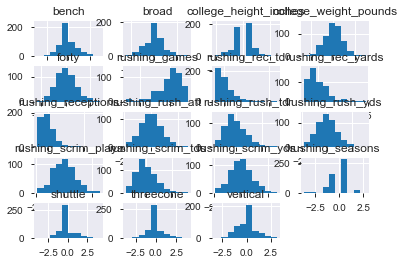

In [314]:
# histograms for some interesting measurements
value_data.hist()
pyplot.show()

In [315]:
X_train, X_validation, Y_train, Y_validation = train_test_split(value_data, label_data, test_size=0.20, random_state=1)

In [316]:
X_train.values

array([[-1.38630671, -2.04293325, -0.60627493, ..., -0.63896984,
        -1.09001015, -0.45113786],
       [-0.18762749,  0.25332807,  0.13012033, ..., -0.42744879,
        -0.99371525,  0.62669377],
       [-0.96324345, -0.89480259, -0.79037374, ..., -0.14542072,
        -0.00996652, -1.52896948],
       ...,
       [ 0.23543577,  0.8273934 ,  0.22216973, ..., -0.99150492,
        -1.32034755, -1.52896948],
       [ 0.94054119,  1.40145873, -0.97447255, ...,  0.3481284 ,
         0.42066428,  0.62669377],
       [ 0.09441468, -0.32073726,  0.        , ..., -0.92099791,
        -0.89742034, -0.45113786]])

In [317]:
#Logistic Regression:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
madden_predict = clf.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))

Accuracy:  0.6320754716981132
R2 : -0.1555110853652113


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [318]:
# Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
# Plot predictions
def plot_it(y_train, y_valid, model_title):
    plt.scatter(y_train, train_labels, c = "blue", alpha=0.6, marker = "o", label = "Training data")
    plt.scatter(y_valid, dev_labels, c = "green", alpha=0.6, marker = "o", label = "Validation data")
    plt.title(model_title)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()

Lasso Model
Accuracy:  0.018867924528301886
R2 : 0.027472747380062223
MSE : 164.35849056603774
Lasso model picked 14 out of 19 features


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.075848270811548, tolerance: 6.786753554502371
  positive)


TypeError: plot_it() missing 3 required positional arguments: 'y_train', 'y_valid', and 'model_title'

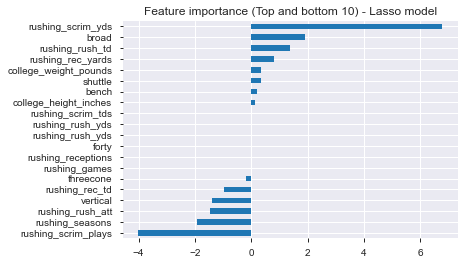

In [319]:
#Lasso:
alpha = 0.1
lasso_model = Lasso(alpha=alpha).fit(X_train, Y_train)
madden_predict = lasso_model.predict(X_validation)

madden_predict = np.around(madden_predict, decimals = 0)

print('Lasso Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(lasso_model.coef_, 'Lasso')  
plot_it()
print('----------')



C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.2433323733566795, tolerance: 6.786753554502371
  positive)


Accuracy:  0.018867924528301886
R2 : 0.024793301385012456
MSE : 164.81132075471697
LassoCV Model
Lassocv model picked 14 out of 19 features
----------


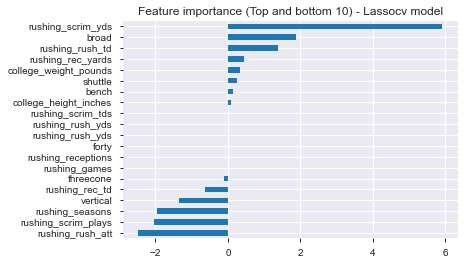

In [320]:
#Lassocv:

lasso_modelcv = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = lasso_modelcv.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
print('LassoCV Model')
plot_feat_import(lasso_modelcv.coef_, 'Lassocv') 
print('----------')









RidgeCV Model
Accuracy:  0.02830188679245283
R2 : 0.010949497077255343
MSE : 167.1509433962264
RidgeCV model picked 19 out of 19 features
----------


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


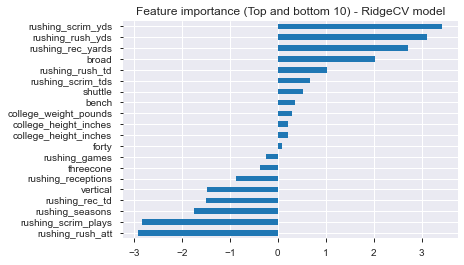

In [321]:
#RidgeCV:

ridge_model = RidgeCV(cv=5).fit(X_train, Y_train)
madden_predict = ridge_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)

print('RidgeCV Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))

plot_feat_import(ridge_model.coef_, 'RidgeCV')
print('----------')

ElasticNetCV Model
Accuracy:  0.018867924528301886
R2 : 0.011451893201327112
MSE : 167.06603773584905
ElasticNetCV model picked 18 out of 19 features


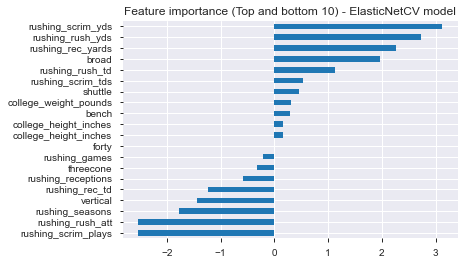

In [324]:
#ElasticNetCV:

elasticnetcv_model = ElasticNetCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = elasticnetcv_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('ElasticNetCV Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(elasticnetcv_model.coef_, 'ElasticNetCV')


Accuracy:  0.33962264150943394
R2 : -1.0806364823934138
MSE : 340.3490566037736
Decision Tree Regressor model picked 20 out of 20 features
Accuracy:  0.41509433962264153
R2 : -0.4187914212201782
MSE : 232.08490566037736
Accuracy:  0.3490566037735849
R2 : -0.9942436711667226
MSE : 326.2169811320755


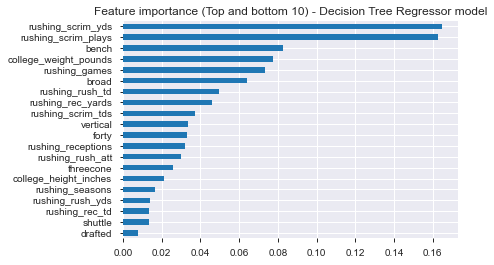

In [220]:
#Decision Tree Regressor
from sklearn import tree
decisiontreeregrssor = DecisionTreeRegressor()
decisiontreeregrssor.fit(X_train, Y_train)
madden_predict = decisiontreeregrssor.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontreeregrssor.feature_importances_, 'Decision Tree Regressor')

Accuracy:  0.42452830188679247
R2 : -0.4717344123457474
MSE : 240.74528301886792
AdaBoostRegressor model picked 20 out of 20 features


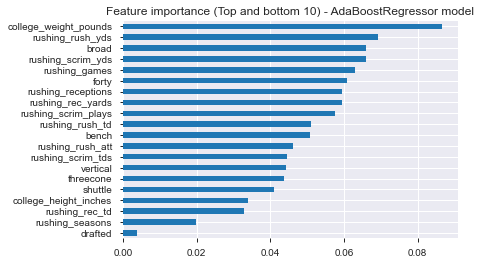

In [240]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=300)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')



Accuracy:  0.5283018867924528
R2 : -0.5127705513718468
MSE : 255.66037735849056
Decision Tree Classifier model picked 19 out of 19 features


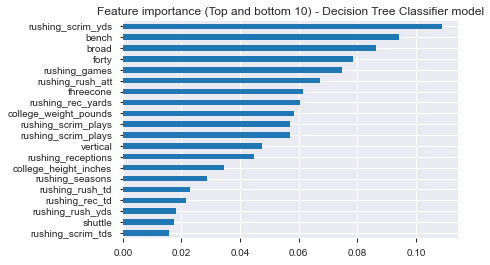

In [325]:
#Decision Tree
from sklearn import tree
decisiontree = DecisionTreeClassifier(max_depth = 100)
decisiontree.fit(X_train, Y_train)
madden_predict = decisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontree.feature_importances_, 'Decision Tree Classifier')

C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.6226415094339622
R2 : -0.23366159355416283
MSE : 208.49056603773585
Extra Tree Classifier model picked 19 out of 19 features


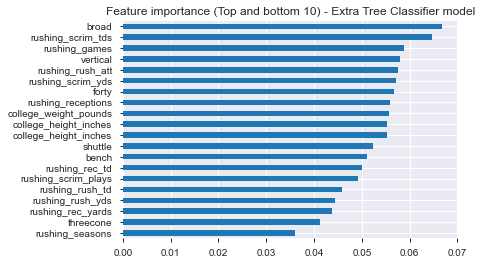

In [326]:
#Extra Tree
from sklearn import tree
extradecisiontree = ExtraTreesClassifier(max_depth = 100)
extradecisiontree.fit(X_train, Y_train)
madden_predict = extradecisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(extradecisiontree.feature_importances_, 'Extra Tree Classifier')

In [327]:
#PCA with Linear Regression
pca = PCA(n_components=5)
pca_x = pca.fit_transform(X_train)
pca_validation = pca.transform(X_validation)

log_pca = LogisticRegression(random_state=0).fit(pca_x, Y_train)
madden_predict = log_pca.predict(pca_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
#print(log_pca.coef_.shape)
#plot_feat_import(log_pca.coef_, 'PCA with Log Regression')

Accuracy:  0.6415094339622641
R2 : -0.2001685186160409
MSE : 202.83018867924528


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:  0.03773584905660377
R2 : -0.0308052030122703
R2 : 174.20754716981133
Gradient Booster Regressor model picked 19 out of 19 features


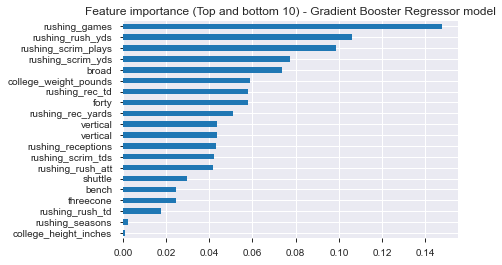

In [328]:
#Gradient Booster Regressor
import numpy as np
gradientboostingregressor = GradientBoostingRegressor(random_state=0)
gradientboostingregressor.fit(X_train, Y_train)
madden_predict = gradientboostingregressor.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('R2 : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(gradientboostingregressor.feature_importances_, 'Gradient Booster Regressor')

In [322]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LASSO', Lasso(alpha=0.1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=200)))
models.append(('RFC', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, value_data, label_data, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


LR: 0.610119 (0.038533)
LDA: 0.608309 (0.045182)
KNN: 0.563119 (0.030394)
CART: 0.475146 (0.050228)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are colline

ABC: 0.396145 (0.108865)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GBC: 0.577947 (0.031209)
RFC: 0.591292 (0.036062)
GNB: 0.475340 (0.032538)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

SVM: 0.602750 (0.017260)
ETC: 0.591712 (0.036477)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

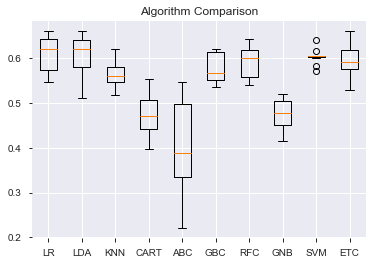

In [323]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()